In [4]:
# An instruction to install a required Python package named ucimlrepo using the pip package manager.
!pip install ucimlrepo
!pip install scikeras

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations
import numpy as np

# Import libraries for data visualization, modeling, and plotting
import seaborn as sns
#from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Importing a custom module or library for fetching datasets
from ucimlrepo import fetch_ucirepo

# Importing train_test_split function for splitting datasets
from sklearn.model_selection import train_test_split

# Importing LinearRegression for linear regression modeling
from sklearn.linear_model import LinearRegression

# Importing RandomForestClassifier for random forest classification
from sklearn.ensemble import RandomForestClassifier

# Importing Lasso and Ridge for linear regression with regularization
from sklearn.linear_model import Lasso, Ridge

# Importing metrics for model evaluation (mean_squared_error, accuracy_score)
from sklearn.metrics import mean_squared_error, accuracy_score

# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Importing matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Importing TensorFlow for deep learning
import tensorflow as tf

# Importing Keras, a high-level neural networks API on top of TensorFlow
from tensorflow import keras

# Importing learning_curve for generating learning curves
from sklearn.model_selection import learning_curve


In [5]:
# Fetching air quality dataset with ID 360 from the UCI Machine Learning Repository
air_quality = fetch_ucirepo(id=360)

# Creating a DataFrame for features (X_df) using the data from the air_quality dataset
X_df = pd.DataFrame(data=air_quality.data.features, columns=air_quality.feature_names)

# Creating a DataFrame for the target variable (y_df) using the data from the air_quality dataset
# The target variable is named "Target" in this DataFrame
y_df = pd.DataFrame(data=air_quality.data.targets, columns=["Target"])

# Concatenate features and target DataFrames along columns
df = pd.concat([X_df, y_df], axis=1)

# Displaying the first few rows of the DataFrame (df) to inspect the data structure
print(df.head())

# Printing the shape of the DataFrame (df), which shows the number of rows and columns
print(df.shape)

# Printing the column names of the DataFrame (df) for reference
print(df.columns)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH Target  
0  13.6  48.9  0.7578    NaN  
1  13.3  47.7  0.7255    NaN  
2  11.9  54.0  0.7502    NaN 

In [6]:
# Data preprocessing

# Using ILOC to remove unwanted columns
df = df.iloc[:, :-1]

# Verify the number of rows and columns
print(df.shape)
# Verify column names of the DataFrame (df)
print(df.columns)

#  Handling missing values by replacing them with the mean value of each respective column.
df = df.fillna(df.mean())


(9357, 15)
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


<ipython-input-6-30304f8ac269>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041411  0.128351 -0.031378       0.029926   
PT08.S1(CO)    0.041411     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.128351     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)      -0.031378     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.029926     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.526451     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.089981     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.671127     0.154030  0.103307 -0.010992       0.176488   
PT08.S4(NO2)  -0.073724     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.080310     0.892434  0.101185  0.641334       0.909905   
T             -0.068939     0.754844 -0.000009  0.971375       0.669025   
RH            -0.048227     0.745375  0.008284  0.925062       0.585803   
AH            -0.045892  

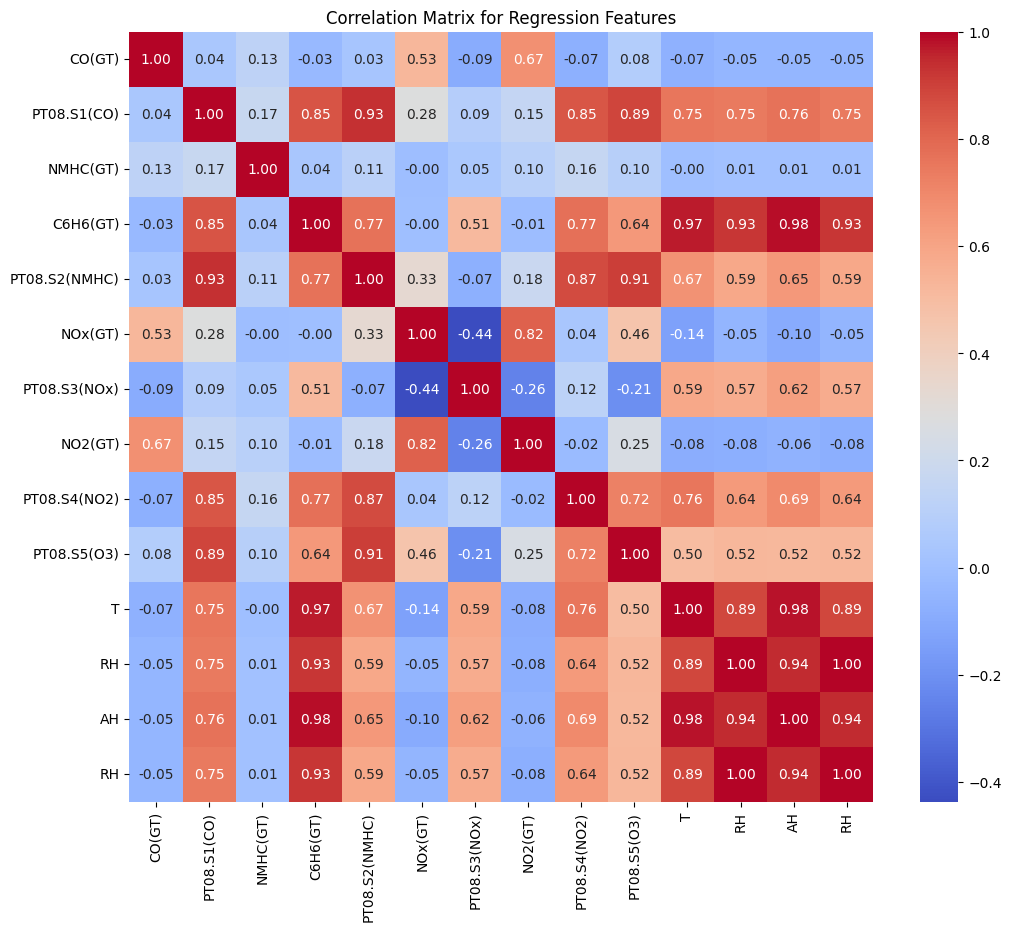

In [7]:
# Separate features and target variable for regression
regression_features = df[['CO(GT)',
                          'PT08.S1(CO)',
                          'NMHC(GT)',
                          'C6H6(GT)',
                          'PT08.S2(NMHC)',
                          'NOx(GT)',
                          'PT08.S3(NOx)',
                          'NO2(GT)',
                          'PT08.S4(NO2)',
                          'PT08.S5(O3)',
                          'T',
                          'RH',
                          'AH']]
regression_target = df['RH']

# Concatenate the features and target into one DataFrame
regression_data = pd.concat([regression_features, regression_target], axis=1)

# Calculate the correlation matrix
correlation_matrix = regression_data.corr()
print(correlation_matrix)

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Regression Features')
plt.show()



In [8]:
# Separate features and target variable for classification
classification_features = df[['CO(GT)',
                          'PT08.S1(CO)',
                          'NMHC(GT)',
                          'C6H6(GT)',
                          'PT08.S2(NMHC)',
                          'NOx(GT)',
                          'PT08.S3(NOx)',
                          'NO2(GT)',
                          'PT08.S4(NO2)',
                          'PT08.S5(O3)',
                          'T',
                          'RH',
                          'AH']]
# Binary classification based on median
classification_target = (df['RH'] > df['RH'].median()).astype(int)

# Split the data into training and testing sets
regression_X_train, regression_X_test, regression_y_train, regression_y_test = train_test_split(regression_features, regression_target, test_size=0.2, random_state=42)

# Check for empty sets in regression split
if len(regression_X_train) == 0 or len(regression_X_test) == 0:
    raise ValueError("Empty sets encountered in regression split. Adjust parameters or handle missing values accordingly.")

# Split the data into training and testing sets for classification
classification_X_train, classification_X_test, classification_y_train, classification_y_test = train_test_split(classification_features, classification_target, test_size=0.2, random_state=42)

# Check for empty sets in classification split
if len(classification_X_train) == 0 or len(classification_X_test) == 0:
    raise ValueError("Empty sets encountered in classification split. Adjust parameters or handle missing values accordingly.")



In [9]:
# Linear Regression Model
linear_regression_model = LinearRegression()
linear_regression_model.fit(regression_X_train, regression_y_train)

# Make predictions for training set
regression_train_predictions = linear_regression_model.predict(regression_X_train)
regression_test_predictions = linear_regression_model.predict(regression_X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(regression_X_train, regression_y_train)
lasso_predictions = lasso_model.predict(regression_X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(regression_X_train, regression_y_train)
ridge_predictions = ridge_model.predict(regression_X_test)



In [10]:
# Classification Model (Random Forest)
classification_model = RandomForestClassifier(max_depth=10, random_state=42)
classification_model.fit(classification_X_train, classification_y_train)

# Make predictions for training set
classification_train_predictions = classification_model.predict(classification_X_train)
classification_test_predictions = classification_model.predict(classification_X_test)



In [11]:
# Evaluate the models on training set
regression_train_rmse = mean_squared_error(regression_y_train, regression_train_predictions, squared=False)
classification_train_accuracy = accuracy_score(classification_y_train, classification_train_predictions)

# Evaluate the models on test set
regression_test_rmse = mean_squared_error(regression_y_test, regression_test_predictions, squared=False)
classification_test_accuracy = accuracy_score(classification_y_test, classification_test_predictions)

# Display results
print("Linear Regression:")
print(f"Training RMSE: {regression_train_rmse}")
print(f"Test RMSE: {regression_test_rmse}")

print("\nRandom Forest Classification:")
print(f"Training Accuracy: {classification_train_accuracy}")
print(f"Test Accuracy: {classification_test_accuracy}")

Linear Regression:
Training RMSE: 1.7661552148347881e-13
Test RMSE: 1.6632819087473683e-13

Random Forest Classification:
Training Accuracy: 1.0
Test Accuracy: 1.0


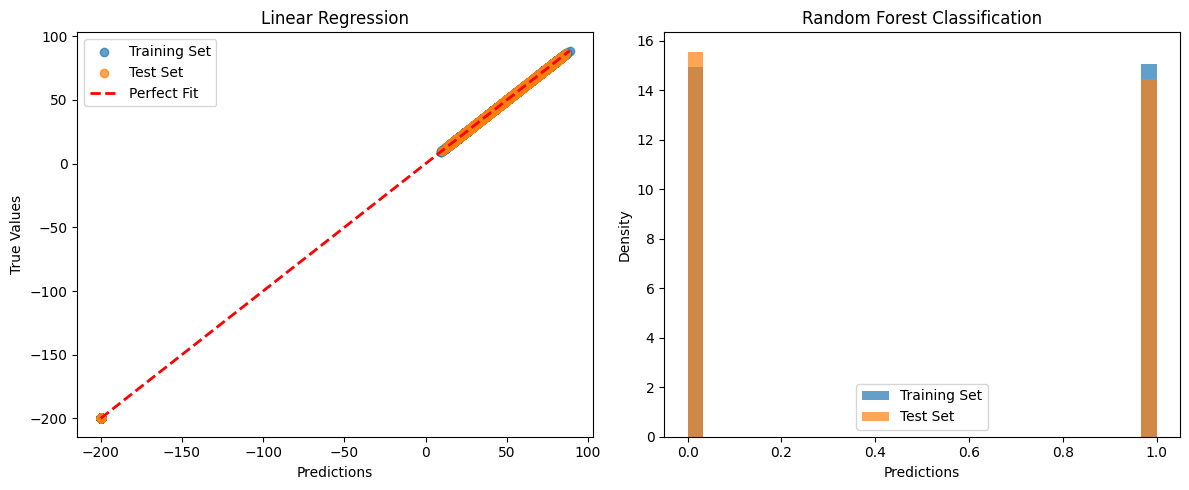

In [12]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression Plot
axes[0].scatter(regression_train_predictions, regression_y_train, label='Training Set', alpha=0.7)
axes[0].scatter(regression_test_predictions, regression_y_test, label='Test Set', alpha=0.7)
axes[0].plot([min(regression_train_predictions.min(), regression_y_train.min()), max(regression_train_predictions.max(), regression_y_train.max())], [min(regression_train_predictions.min(), regression_y_train.min()), max(regression_train_predictions.max(), regression_y_train.max())], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Predictions')
axes[0].set_ylabel('True Values')
axes[0].legend()

# Random Forest Classification Plot
axes[1].hist(classification_train_predictions, bins=30, alpha=0.7, label='Training Set', density=True)
axes[1].hist(classification_test_predictions, bins=30, alpha=0.7, label='Test Set', density=True)
axes[1].set_title('Random Forest Classification')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

In [37]:
# Define a simple linear regression model using TensorFlow/Keras
regression_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(regression_X_train.shape[1],))
])

# Compile the model
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with testing loss and validation
regression_history = regression_model.fit(regression_X_train, regression_y_train, epochs=50, validation_data=(regression_X_test, regression_y_test), verbose=1)



Epoch 1/50
234/234 [==============================] - 1s 3ms/step - loss: 955145.9375 - val_loss: 245134.7500
Epoch 2/50
234/234 [==============================] - 0s 2ms/step - loss: 106769.3750 - val_loss: 52313.2109
Epoch 3/50
234/234 [==============================] - 1s 2ms/step - loss: 43431.3672 - val_loss: 36332.9102
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 32319.9902 - val_loss: 28217.6855
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 25605.5371 - val_loss: 23098.9121
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 21298.3047 - val_loss: 19618.3184
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 18285.4141 - val_loss: 16995.2793
Epoch 8/50
234/234 [==============================] - 0s 2ms/step - loss: 15933.2793 - val_loss: 14783.3516
Epoch 9/50
234/234 [==============================] - 1s 2ms/step - loss: 13933.5088 - val_loss: 12860.3320
Epoch 10/50
234/234 [====

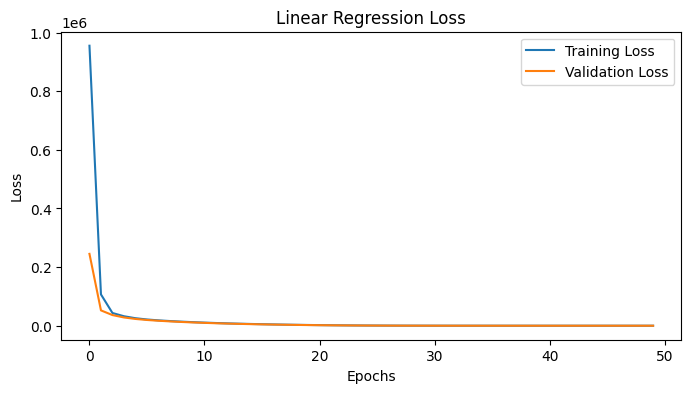

In [38]:
# Plot Testing Loss and Validation Loss for Linear Regression
plt.figure(figsize=(8, 4))
plt.plot(regression_history.history['loss'], label='Training Loss')
plt.plot(regression_history.history['val_loss'], label='Validation Loss')
plt.title('Linear Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Define a simple neural network for classification using TensorFlow/Keras
classification_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(classification_X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with testing loss and validation
classification_history = classification_model.fit(classification_X_train, classification_y_train, epochs=50, validation_data=(classification_X_test, classification_y_test), verbose=1)

Epoch 1/50
234/234 [==============================] - 1s 3ms/step - loss: 68.5445 - accuracy: 0.5466 - val_loss: 3.3969 - val_accuracy: 0.6784
Epoch 2/50
234/234 [==============================] - 1s 2ms/step - loss: 5.5256 - accuracy: 0.6223 - val_loss: 0.8183 - val_accuracy: 0.6870
Epoch 3/50
234/234 [==============================] - 1s 2ms/step - loss: 1.1046 - accuracy: 0.6318 - val_loss: 0.6301 - val_accuracy: 0.7634
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 0.7695 - accuracy: 0.6343 - val_loss: 0.5704 - val_accuracy: 0.7623
Epoch 5/50
234/234 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.6315 - val_loss: 0.5188 - val_accuracy: 0.7751
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6538 - val_loss: 0.4969 - val_accuracy: 0.7628
Epoch 7/50
234/234 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6560 - val_loss: 0.4588 - val_accuracy: 0.8045
Epoch

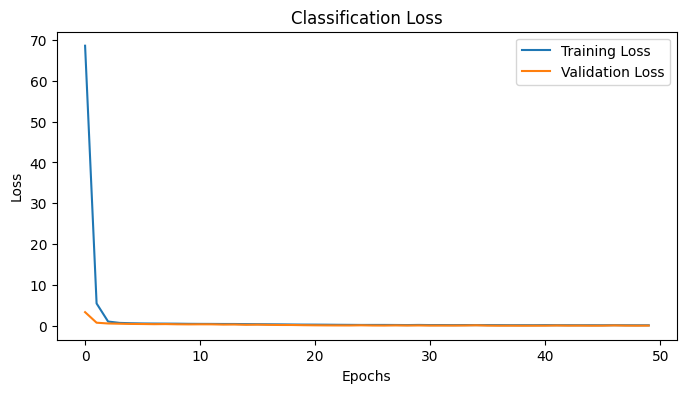

In [40]:
# Plot Testing Loss and Validation Loss for Classification
plt.figure(figsize=(8, 4))
plt.plot(classification_history.history['loss'], label='Training Loss')
plt.plot(classification_history.history['val_loss'], label='Validation Loss')
plt.title('Classification Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Display final results
print("\nFinal Results:")

# Linear Regression
print("\nLinear Regression:")
print(f"Training RMSE: {regression_train_rmse}")
print(f"Test RMSE: {regression_test_rmse}")

# Classification
print("\nRandom Forest Classification:")
print(f"Training Accuracy: {classification_train_accuracy}")
print(f"Test Accuracy: {classification_test_accuracy}")

# Display final regression results
print("\nFinal Regression Results:")
final_regression_train_loss = regression_history.history['loss'][-1]
final_regression_val_loss = regression_history.history['val_loss'][-1]

print(f"Final Training Loss: {final_regression_train_loss}")
print(f"Final Validation Loss: {final_regression_val_loss}")

# Display final classification results
print("\nFinal Classification Results:")
final_classification_train_loss = classification_history.history['loss'][-1]
final_classification_val_loss = classification_history.history['val_loss'][-1]
final_classification_train_accuracy = classification_history.history['accuracy'][-1]
final_classification_val_accuracy = classification_history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_classification_train_loss}")
print(f"Final Validation Loss: {final_classification_val_loss}")
print(f"Final Training Accuracy: {final_classification_train_accuracy}")
print(f"Final Validation Accuracy: {final_classification_val_accuracy}")



Final Results:

Linear Regression:
Training RMSE: 1.7661552148347881e-13
Test RMSE: 1.6632819087473683e-13

Random Forest Classification:
Training Accuracy: 1.0
Test Accuracy: 1.0

Final Regression Results:
Final Training Loss: 2.1590259075164795
Final Validation Loss: 1.8790982961654663

Final Classification Results:
Final Training Loss: 0.18620754778385162
Final Validation Loss: 0.1056341677904129
Final Training Accuracy: 0.9132932424545288
Final Validation Accuracy: 0.9540598392486572


In [42]:
# Function to plot learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 4))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, val_scores_mean, label='Validation Error')

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend()
    plt.show()



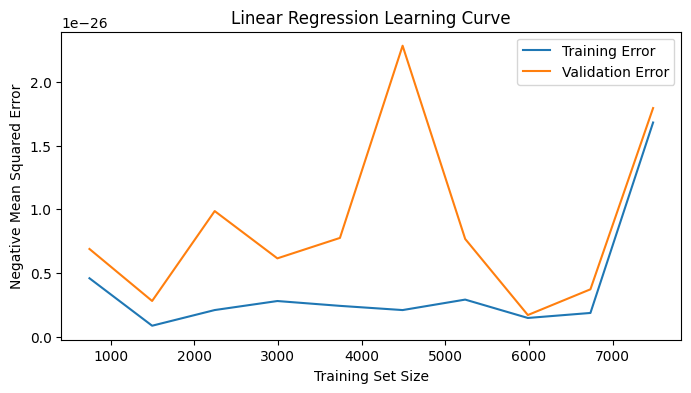

In [43]:
# Plot learning curve for linear regression
plot_learning_curve(linear_regression_model, regression_features, regression_target, 'Linear Regression Learning Curve')

In [45]:
# Function to plot learning curve for classification
def plot_classification_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 4))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')

    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()